In [1]:
#Importing the necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Downloads/Salaries.csv")

In [3]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency,Unnamed: 9
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,2011,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0.00,2014,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN


In [7]:
df.isnull().sum()

Id                0
EmployeeName      0
JobTitle          0
BasePay         605
OvertimePay       0
OtherPay          0
TotalPay          0
Year              0
Agency            0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df = df.drop(columns=['Unnamed: 9'])


In [8]:
df.dropna(subset=['BasePay'],inplace=True)


In [9]:
df.isnull().sum()

Id              0
EmployeeName    0
JobTitle        0
BasePay         0
OvertimePay     0
OtherPay        0
TotalPay        0
Year            0
Agency          0
dtype: int64

In [11]:
df.shape

(148049, 9)

In [12]:
df.info()

<class 'pandas.DataFrame'>
Index: 148049 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            148049 non-null  int64  
 1   EmployeeName  148049 non-null  str    
 2   JobTitle      148049 non-null  str    
 3   BasePay       148049 non-null  object 
 4   OvertimePay   148049 non-null  object 
 5   OtherPay      148049 non-null  object 
 6   TotalPay      148049 non-null  float64
 7   Year          148049 non-null  int64  
 8   Agency        148049 non-null  str    
dtypes: float64(1), int64(2), object(3), str(3)
memory usage: 11.3+ MB


In [13]:
df.describe()

,Id,TotalPay,Year
count,148049.000000,148049.000000,148049.000000
mean,74194.691744,75055.823129,2012.520692
std,42949.648477,50410.589880,1.119401
min,1.000000,-618.130000,2011.000000
25%,37013.000000,36953.510000,2012.000000
50%,74025.000000,71643.410000,2013.000000
75%,111642.000000,106028.000000,2014.000000
max,148654.000000,567595.430000,2014.000000


In [15]:
list(df.columns)

['Id',
 'EmployeeName',
 'JobTitle',
 'BasePay',
 'OvertimePay',
 'OtherPay',
 'TotalPay',
 'Year',
 'Agency']

In [16]:
df.nunique()

Id              148049
EmployeeName    110314
JobTitle          2155
BasePay         109900
OvertimePay      66553
OtherPay         84695
TotalPay        138188
Year                 4
Agency               1
dtype: int64

In [17]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,2011,San Francisco


In [18]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency
148649,148650,Roy I Tillery,Custodian,0,0,0,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0,0,-618.13,-618.13,2014,San Francisco


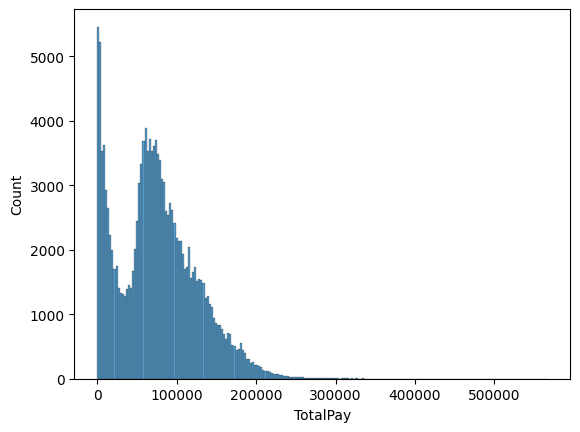

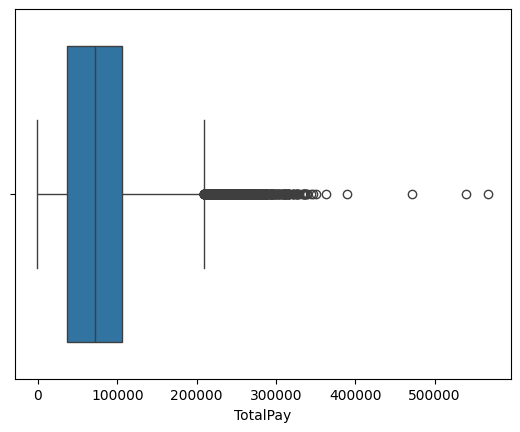

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df["TotalPay"] = pd.to_numeric(df["TotalPay"], errors="coerce")

sns.histplot(df["TotalPay"].dropna())
plt.show()

sns.boxplot(x=df["TotalPay"].dropna())
plt.show()

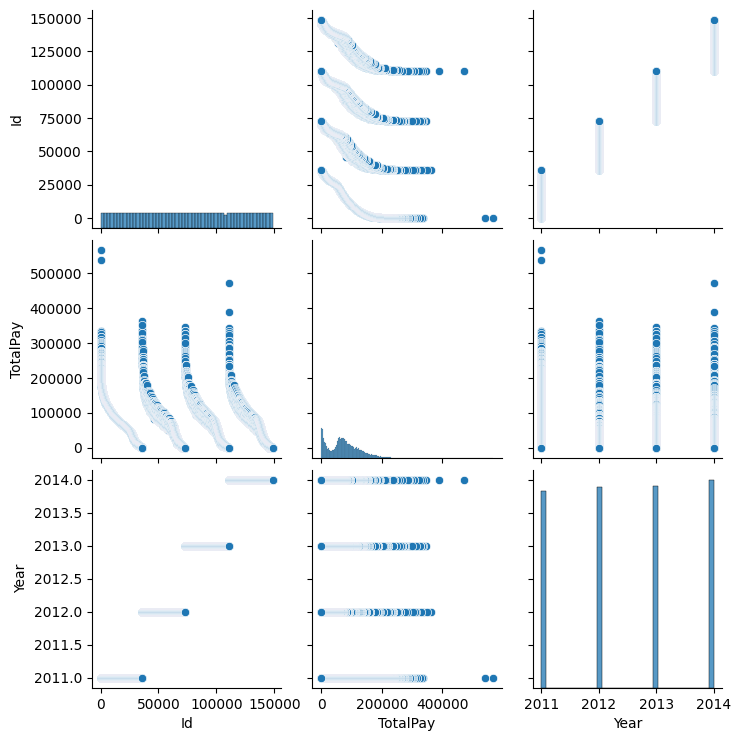

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


In [21]:
df['TotalPay'].value_counts()

TotalPay
 18594.00     82
 0.00         80
 123290.70    56
 132242.50    49
 105489.00    42
              ..
 13.77         1
 13.35         1
 12.89         1
 6.00          1
-618.13        1
Name: count, Length: 138188, dtype: int64

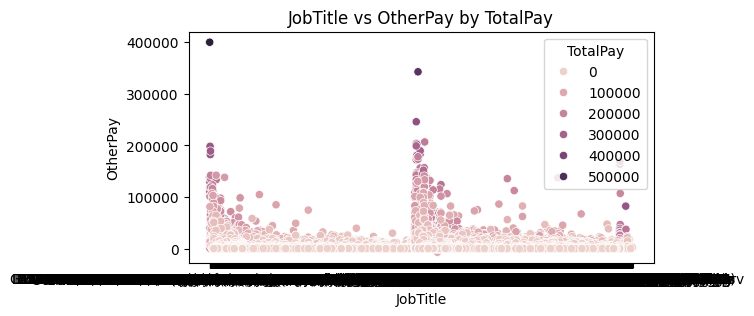

In [23]:
df['OtherPay'] = df['OtherPay'].replace('Not Provided', np.nan)
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x='JobTitle', y='OtherPay', hue='TotalPay')
plt.title("JobTitle vs OtherPay by TotalPay")
plt.show()

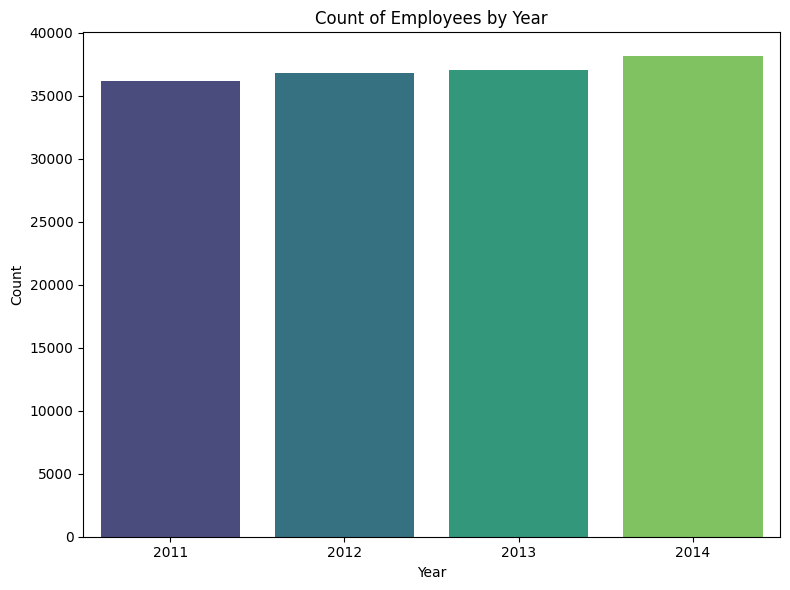

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Year', palette='viridis')
plt.title('Count of Employees by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



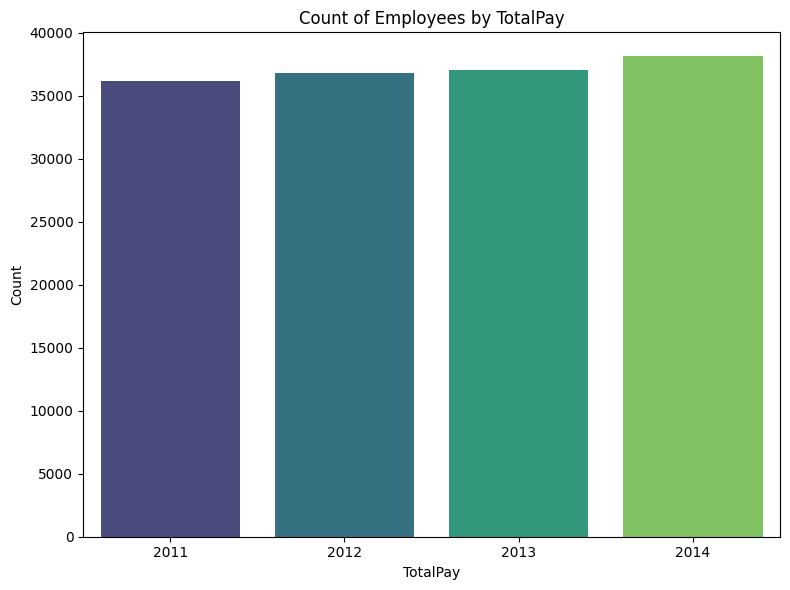

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Year', palette='viridis')
plt.title('Count of Employees by TotalPay')
plt.xlabel('TotalPay')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


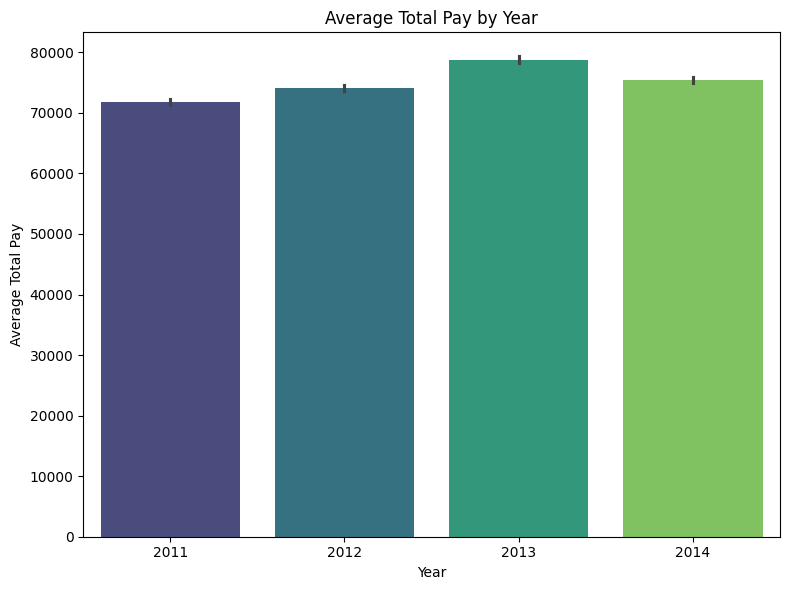

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Year', y='TotalPay', palette='viridis')
plt.title('Average Total Pay by Year')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.tight_layout()
plt.show()


In [24]:
cat = df.select_dtypes(include='object')
cat

,EmployeeName,JobTitle,BasePay,OvertimePay,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,San Francisco
...,...,...,...,...,...
148649,Roy I Tillery,Custodian,0,0,San Francisco
148650,Not provided,Not provided,Not Provided,Not Provided,San Francisco
148651,Not provided,Not provided,Not Provided,Not Provided,San Francisco
148652,Not provided,Not provided,Not Provided,Not Provided,San Francisco


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
#Select features and target
X = df[['BasePay', 'OvertimePay', 'OtherPay']]
y = df['TotalPay']


In [29]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [40]:
# Make predictions on the test set
y_pred = poly_reg.predict(X_test_poly)


In [42]:
y_pred = model.predict(X_test)

In [45]:
r2_score(y_test,y_pred)

1.0

In [49]:
y_pred1 = model.predict([[	212739.13	,106088.18	,16452.60	]])
y_pred1

array([335279.91])

In [47]:
df.head(15)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.90,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,2011,San Francisco
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,316285.74,2011,San Francisco
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,315981.05,2011,San Francisco
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.50,307899.46,2011,San Francisco
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,303427.55,2011,San Francisco
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,302377.73,2011,San Francisco


In [50]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Example: Predict Profit using Sales
X = df[['OtherPay']]  # independent variables
y = df['TotalPay']   # dependent variable

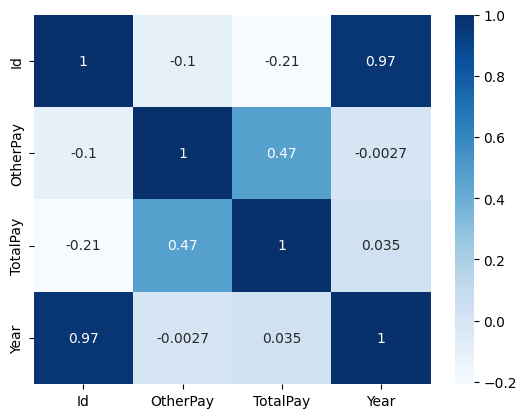

In [54]:
cr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(cr, annot=True, cmap='Blues')
plt.show()

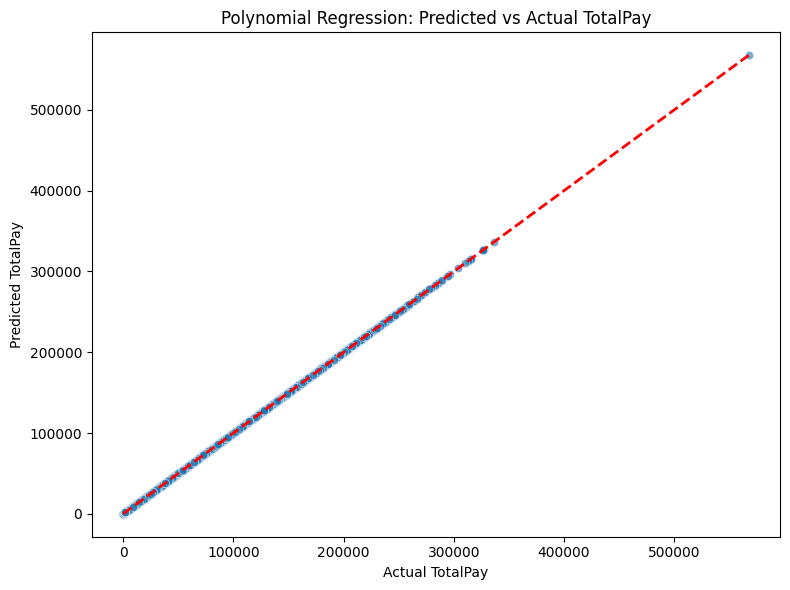

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.title('Polynomial Regression: Predicted vs Actual TotalPay')
plt.xlabel('Actual TotalPay')
plt.ylabel('Predicted TotalPay')
plt.tight_layout()
plt.show()


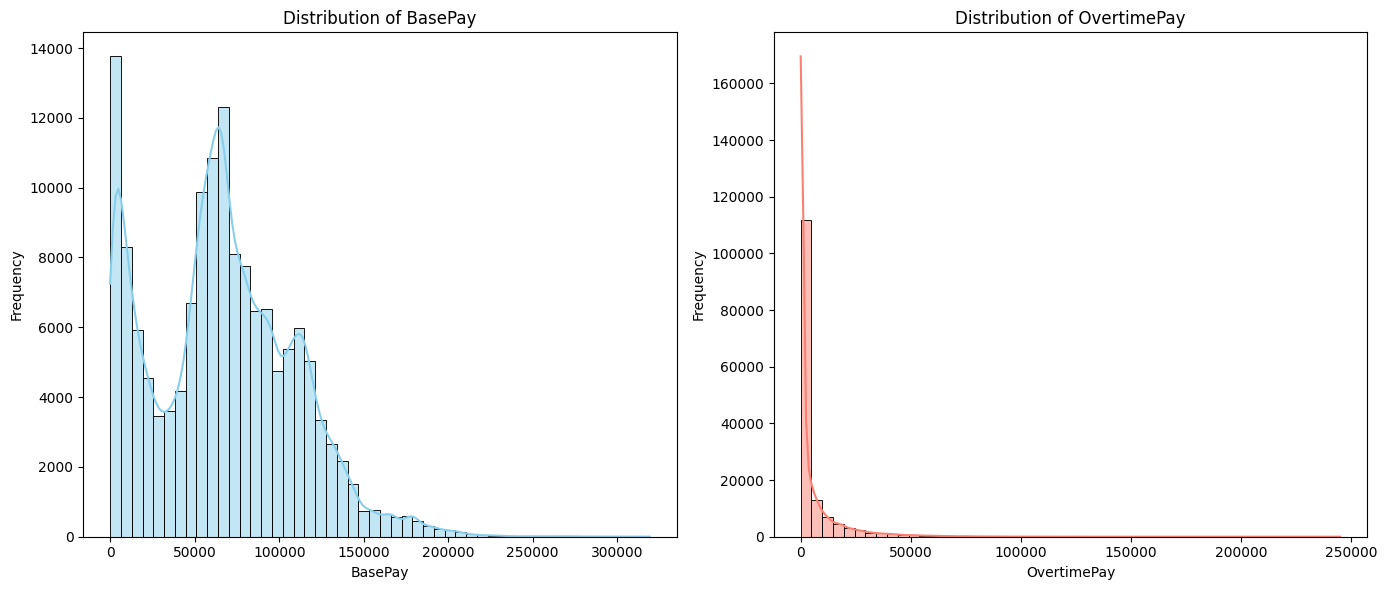

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(14, 6))

# Histogram for BasePay
plt.subplot(1, 2, 1)
sns.histplot(df['BasePay'].apply(pd.to_numeric, errors='coerce'),bins=50, kde=True, color='skyblue')
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')

# Histogram for OvertimePay
plt.subplot(1, 2, 2)
sns.histplot(df['OvertimePay'].apply(pd.to_numeric, errors='coerce'),bins=50, kde=True, color='salmon')
plt.title('Distribution of OvertimePay')
plt.xlabel('OvertimePay')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


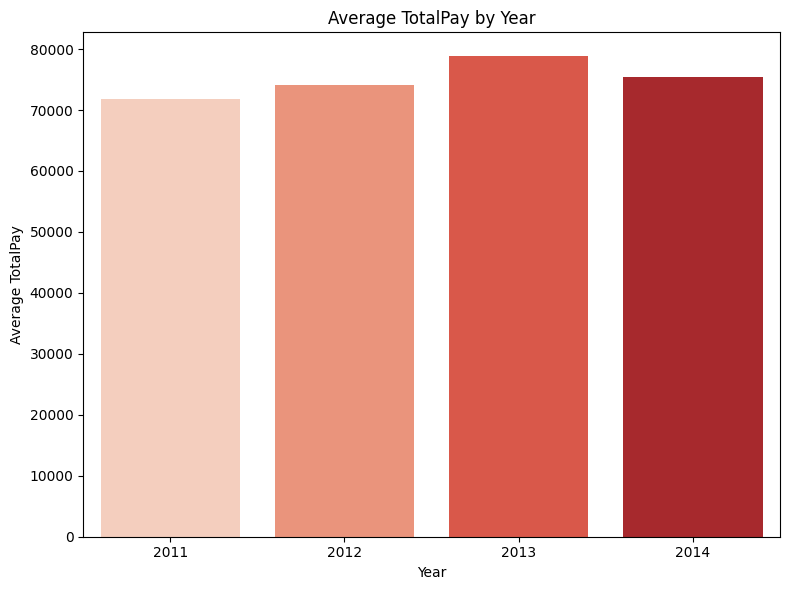

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average TotalPay per Year
year_avg = df.groupby('Year')['TotalPay'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=year_avg, x='Year', y='TotalPay', palette='Reds')
plt.title('Average TotalPay by Year')
plt.xlabel('Year')
plt.ylabel('Average TotalPay')
plt.tight_layout()
plt.show()


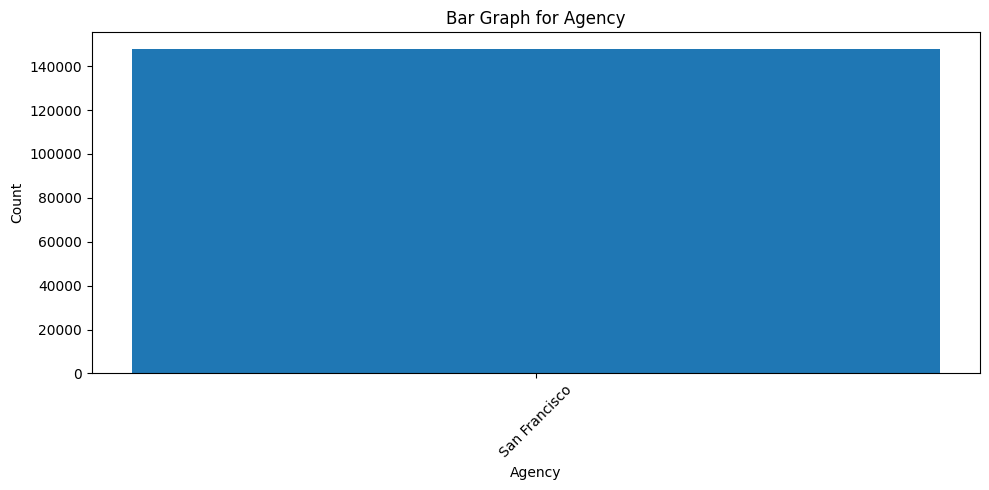

In [61]:
import matplotlib.pyplot as plt

agency_counts = df['Agency'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(agency_counts.index, agency_counts.values)
plt.xlabel('Agency')
plt.ylabel('Count')
plt.title('Bar Graph for Agency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

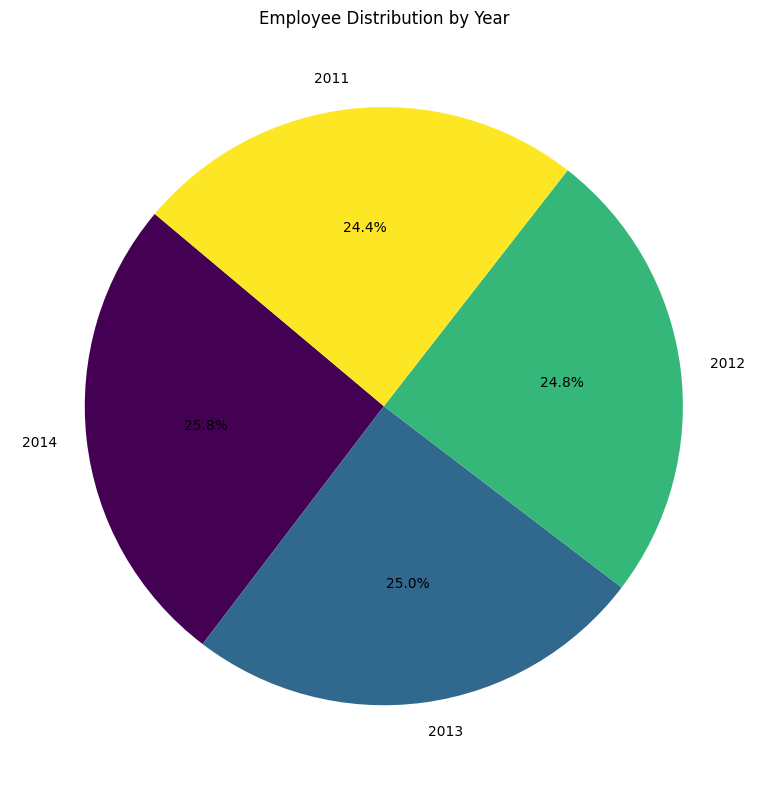

In [69]:
import matplotlib.pyplot as plt

# Count number of employees per Year
year_counts = df['Year'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(year_counts))))
plt.title('Employee Distribution by Year')
plt.tight_layout()
plt.show()


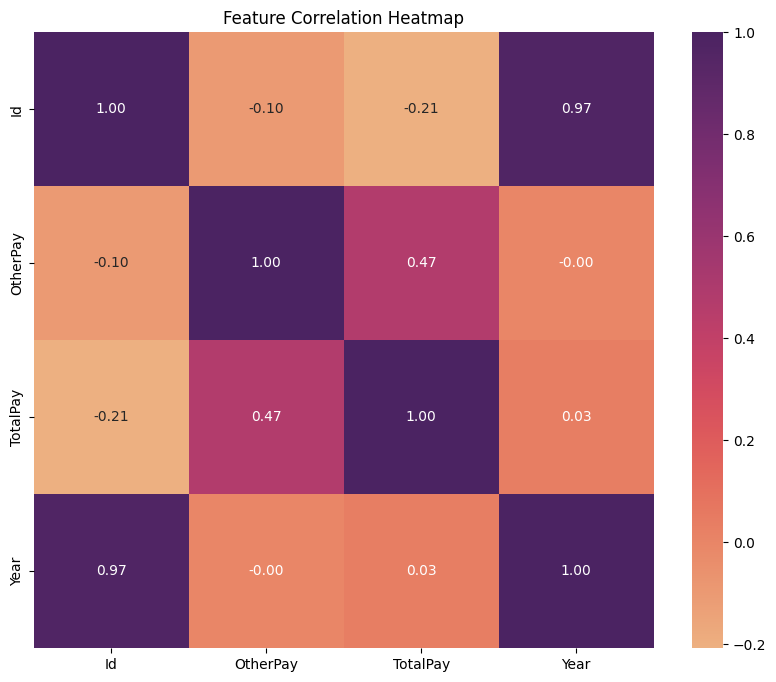

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()
